In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
sns.set(color_codes=True)

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Loading data
initial_path = '/Users/Olivia/SMUDS/Capstone/B/Github/Dataset Creation/'

# 2014 Datasets
df_elem_14 = pd.read_csv(initial_path+'2014/PublicElementarySchools2014_LPS_Processed.csv')
df_mid_14 = pd.read_csv(initial_path+'2014/PublicMiddleSchools2014_LPS_Processed.csv')
df_high_14 = pd.read_csv(initial_path+'2014/PublicHighSchools2014_LPS_Processed.csv')

# 2015 Datasets
df_elem_15 = pd.read_csv(initial_path+'2015/PublicElementarySchools2015_LPS_Processed.csv')
df_mid_15 = pd.read_csv(initial_path+'2015/PublicMiddleSchools2015_LPS_Processed.csv')
df_high_15 = pd.read_csv(initial_path+'2015/PublicHighSchools2015_LPS_Processed.csv')

# 2016 Datasets
df_elem_16 = pd.read_csv(initial_path+'2016/PublicElementarySchools2016_LPS_Processed.csv')
df_mid_16 = pd.read_csv(initial_path+'2016/PublicMiddleSchools2016_LPS_Processed.csv')
df_high_16 = pd.read_csv(initial_path+'2016/PublicHighSchools2016_LPS_Processed.csv')

# 2017 Datasets
df_elem_17 = pd.read_csv(initial_path+'2017/PublicElementarySchools2017_LPS_Processed.csv')
df_mid_17 = pd.read_csv(initial_path+'2017/PublicMiddleSchools2017_LPS_Processed.csv')
df_high_17 = pd.read_csv(initial_path+'2017/PublicHighSchools2017_LPS_Processed.csv')

# Changing to LPS so it works with the xgboost functions
df_elem_17 = df_elem_17.rename(columns = {'LPS_17' : 'LPS'})
df_mid_17 = df_mid_17.rename(columns = {'LPS_17' : 'LPS'})
df_high_17 = df_high_17.rename(columns = {'LPS_17' : 'LPS'})


# Loading in columns for different categories
fileObject = open(initial_path+'2014/TableColumns/environmentCols_14.pkl', 'rb')
environment_cols = pickle.load(fileObject)

fileObject = open(initial_path+'2014/TableColumns/personnelCols_14.pkl', 'rb')
personnel_cols = pickle.load(fileObject)

fileObject = open(initial_path+'2014/TableColumns//yoeCols_14.pkl', 'rb')
yoe_cols = pickle.load(fileObject)

# Full list of columns, including Personnel, Environment, and Teacher Experience Variables
combined_cols = (environment_cols + list(set(personnel_cols) - set(environment_cols)))
yoe_cols = ['0-3 Years_Exp_Pct_Tch',
            '10+ Years_Exp_Pct_Tch',
            '4-10 Years_Exp_Pct_Tch',
            '0-3 Years_LEA_Exp_Pct_Prin',
            '10+ Years_LEA_Exp_Pct_Prin',
            '4-10 Years_LEA_Exp_Pct_Prin']
for col in yoe_cols:
    combined_cols.append(col)
combined_cols.append('LPS')


# Subsets each dataframe based on the columns it shares with the 
# three sets of variables found in "combined_cols" (environment, personnel, and yoe)
df_elem_14 = df_elem_14[df_elem_14.columns.intersection(combined_cols)]
df_mid_14 = df_mid_14[df_mid_14.columns.intersection(combined_cols)]
df_high_14 = df_high_14[df_high_14.columns.intersection(combined_cols)]
df_elem_15 = df_elem_15[df_elem_15.columns.intersection(combined_cols)]
df_mid_15 = df_mid_15[df_mid_15.columns.intersection(combined_cols)]
df_high_15 = df_high_15[df_high_15.columns.intersection(combined_cols)]
df_elem_16 = df_elem_16[df_elem_16.columns.intersection(combined_cols)]
df_mid_16 = df_mid_16[df_mid_16.columns.intersection(combined_cols)]
df_high_16 = df_high_16[df_high_16.columns.intersection(combined_cols)]
df_elem_17 = df_elem_17[df_elem_17.columns.intersection(combined_cols)]
df_mid_17 = df_mid_17[df_mid_17.columns.intersection(combined_cols)]
df_high_17 = df_high_17[df_high_17.columns.intersection(combined_cols)]

# Storing dfs in list for later iteration
all_datasets = [df_elem_14, df_mid_14, df_high_14,
                df_elem_15, df_mid_15, df_high_15,
                df_elem_16, df_mid_16, df_high_16,
                df_elem_17, df_mid_17, df_high_17]

In [2]:
def xg_booster_seat(df, varset='all'):
    '''Performs xgboost on given set of variables, 
        returns feature importances'''
    
    # Subsetting variables if necessary
    if varset == 'all':
        df = df
    else:
        df = df[df.columns.intersection(varset)]
    
    # Predicting LPS
    y = df['LPS']
    x = df.drop('LPS', axis=1)
        
    # Fitting the model
    model = XGBClassifier(nthread=4)
    model.fit(x, y)
   
    # Storing feature importances in dataframe
    feat_importances = pd.DataFrame(model.feature_importances_, index=x.columns)
    
    return feat_importances

col_names = ["df_elem_14_featimp", "df_mid_14_featimp", "df_high_14_featimp",
            "df_elem_15_featimp", "df_mid_15_featimp", "df_high_15_featimp",
            "df_elem_16_featimp", "df_mid_16_featimp", "df_high_16_featimp",
            "df_elem_17_featimp", "df_mid_17_featimp", "df_high_17_featimp"]

def get_importances(col_names=col_names, varset='all'):
    
    importances = pd.DataFrame()
    for df in all_datasets:
        temp = xg_booster_seat(df, varset=varset)
        importances = pd.concat([importances, temp], axis=1)
    
    importances.columns = col_names
    importances['mean'] = importances.mean(axis=1)
    importances['std'] = importances.std(axis=1)
    
    return importances

# Environment, Personnel, and YOE Variables

In [3]:
%matplotlib inline

In [4]:
all_importances = get_importances()

In [5]:
all_importances_plots = all_importances.sort_values('mean', ascending=False).T.drop(['mean','std'], axis=0)

In [6]:
all_importances_plots

,short_susp_per_c_num,avg_daily_attend_pct,stud_internet_comp_num,tchyrs_0thru3_pct,_1yr_tchr_trnovr_pct,flicensed_teach_pct,unit_code,advance_dgr_pct,tchyrs_4thru10_pct,books_per_student,...,st_books_per_student,st_emer_prov_teach_pct,st_prin_female_pct,st_expelled_per_c_num,st_highqual_class_pct,st_lateral_teach_pct,st_nbpts_num,st_prin_advance_dgr_pct,st_prin_black_pct,0-3 Years_Exp_Pct_Tch
df_elem_14_featimp,0.074419,0.060465,0.094574,0.082171,0.062016,0.013953,0.043411,0.051163,0.043411,NaN,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
df_mid_14_featimp,0.072347,0.032154,0.035370,0.053055,0.038585,0.038585,0.049839,0.045016,0.049839,NaN,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
df_high_14_featimp,0.075732,0.079174,0.036145,0.051635,0.020654,0.049914,0.030981,0.063683,0.051635,NaN,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
df_elem_15_featimp,0.110759,0.077532,0.031646,0.041139,0.055380,0.033228,0.022152,0.064873,0.044304,0.042722,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
df_mid_15_featimp,0.065217,0.033445,0.043478,0.015050,0.075251,0.031773,0.053512,0.025084,0.035117,0.023411,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
df_high_15_featimp,0.091248,0.072626,0.039106,0.037244,0.026071,0.100559,0.068901,0.039106,0.031657,0.005587,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
df_elem_16_featimp,0.098214,0.056548,0.058036,0.037202,0.050595,0.028274,0.016369,0.011905,0.050595,0.032738,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
df_mid_16_featimp,0.080257,0.077047,0.036918,0.046549,0.032103,0.014446,0.020867,0.030498,0.017657,0.041734,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
df_high_16_featimp,0.090559,0.057803,0.044316,0.042389,0.009634,0.040462,0.046243,0.023121,0.001927,0.026975,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
df_elem_17_featimp,0.107477,0.057632,0.062305,0.054517,0.052960,0.051402,0.031153,0.023364,0.031153,0.043614,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0


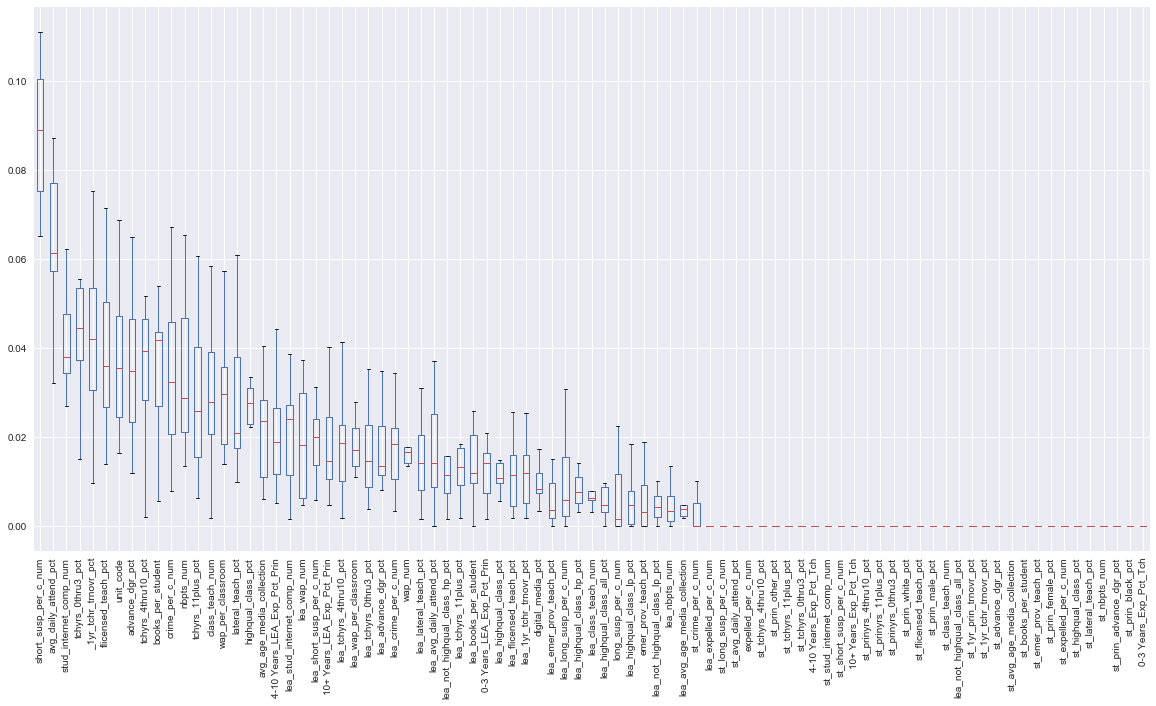

In [8]:
all_importances_plots.boxplot(figsize=(20,10), rot=90)

# Environment Variables Only

In [9]:
environment_vars = [
 'category_cd',
 'avg_daily_attend_pct',
 'crime_per_c_num',
 'short_susp_per_c_num',
 'long_susp_per_c_num',
 'expelled_per_c_num',
 'ttl_crimes_num',
 'stud_internet_comp_num',
 'lea_avg_daily_attend_pct',
 'lea_crime_per_c_num',
 'lea_short_susp_per_c_num',
 'lea_long_susp_per_c_num',
 'lea_expelled_per_c_num',
 'lea_stud_internet_comp_num',
 'st_avg_daily_attend_pct',
 'st_crime_per_c_num',
 'st_short_susp_per_c_num',
 'st_long_susp_per_c_num',
 'st_expelled_per_c_num',
 'st_stud_internet_comp_num',
 'digital_media_pct',
 'Byod',
 'grades_BYOD',
 'avg_age_media_collection',
 '_1_to_1_access',
 'books_per_student',
 'grades_1_to_1_access',
 'lea_avg_age_media_collection',
 'lea_books_per_student',
 'st_avg_age_media_collection',
 'st_books_per_student',
 'wap_num',
 'wap_per_classroom',
 'lea_wap_num',
 'lea_wap_per_classroom',
 'st_wap_num',
 'st_wap_per_classroom',
 'SRC_devices_sent_home',
 'SRC_Grades_Devices_Sent_Home',
 'LPS']

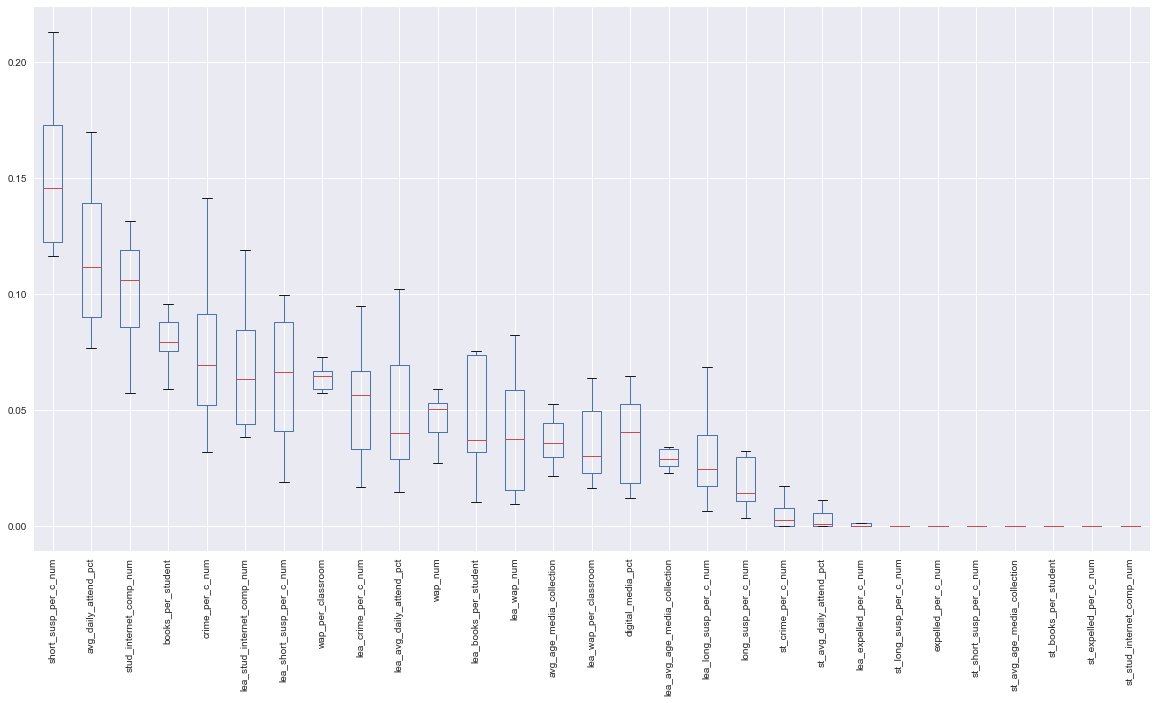

In [10]:
environment_importances = get_importances(varset=environment_vars)
environment_importances_plots = environment_importances.sort_values('mean', ascending=False).T.drop(['mean','std'], axis=0)
environment_importances_plots.boxplot(figsize=(20,10), rot=90)

# Personnel Variables Only

In [6]:
personnel_vars = ['category_cd',
 'total_class_teacher_num',
 'total_nbpts_num',
 'prin_other_pct',
 'prinyrs_0thru3_pct',
 'prinyrs_4thru10_pct',
 'prinyrs_11plus_pct',
 'prin_advance_dgr_pct',
 '_1yr_prin_trnovr_pct',
 'prin_male_pct',
 'prin_female_pct',
 'prin_black_pct',
 'prin_white_pct',
 'flicensed_teach_pct',
 'tchyrs_0thru3_pct',
 'tchyrs_4thru10_pct',
 'tchyrs_11plus_pct',
 'class_teach_num',
 'nbpts_num',
 'advance_dgr_pct',
 '_1yr_tchr_trnovr_pct',
 'emer_prov_teach_pct',
 'lateral_teach_pct',
 'highqual_class_pct',
 'lea_flicensed_teach_pct',
 'lea_tchyrs_0thru3_pct',
 'lea_tchyrs_4thru10_pct',
 'lea_tchyrs_11plus_pct',
 'lea_class_teach_num',
 'lea_nbpts_num',
 'lea_advance_dgr_pct',
 'lea_1yr_tchr_trnovr_pct',
 'lea_emer_prov_teach_pct',
 'lea_lateral_teach_pct',
 'lea_highqual_class_pct',
 'lea_highqual_class_hp_pct',
 'lea_highqual_class_lp_pct',
 'lea_highqual_class_all_pct',
 'lea_not_highqual_class_hp_pct',
 'lea_not_highqual_class_lp_pct',
 'lea_not_highqual_class_all_pct',
 'st_flicensed_teach_pct',
 'st_tchyrs_0thru3_pct',
 'st_tchyrs_4thru10_pct',
 'st_tchyrs_11plus_pct',
 'st_class_teach_num',
 'st_nbpts_num',
 'st_advance_dgr_pct',
 'st_1yr_tchr_trnovr_pct',
 'st_emer_prov_teach_pct',
 'st_lateral_teach_pct',
 'st_highqual_class_pct',
 'st_highqual_class_hp_pct',
 'st_highqual_class_lp_pct',
 'st_highqual_class_all_pct',
 'st_not_highqual_class_hp_pct',
 'st_not_highqual_class_lp_pct',
 'st_not_highqual_class_all_pct',
 'st_prinyrs_0thru3_pct',
 'st_prinyrs_4thru10_pct',
 'st_prinyrs_11plus_pct',
 'st_prin_advance_dgr_pct',
 'st_1yr_prin_trnovr_pct',
 'st_prin_male_pct',
 'st_prin_female_pct',
 'st_prin_black_pct',
 'st_prin_white_pct',
 'st_prin_other_pct',
 'LPS']

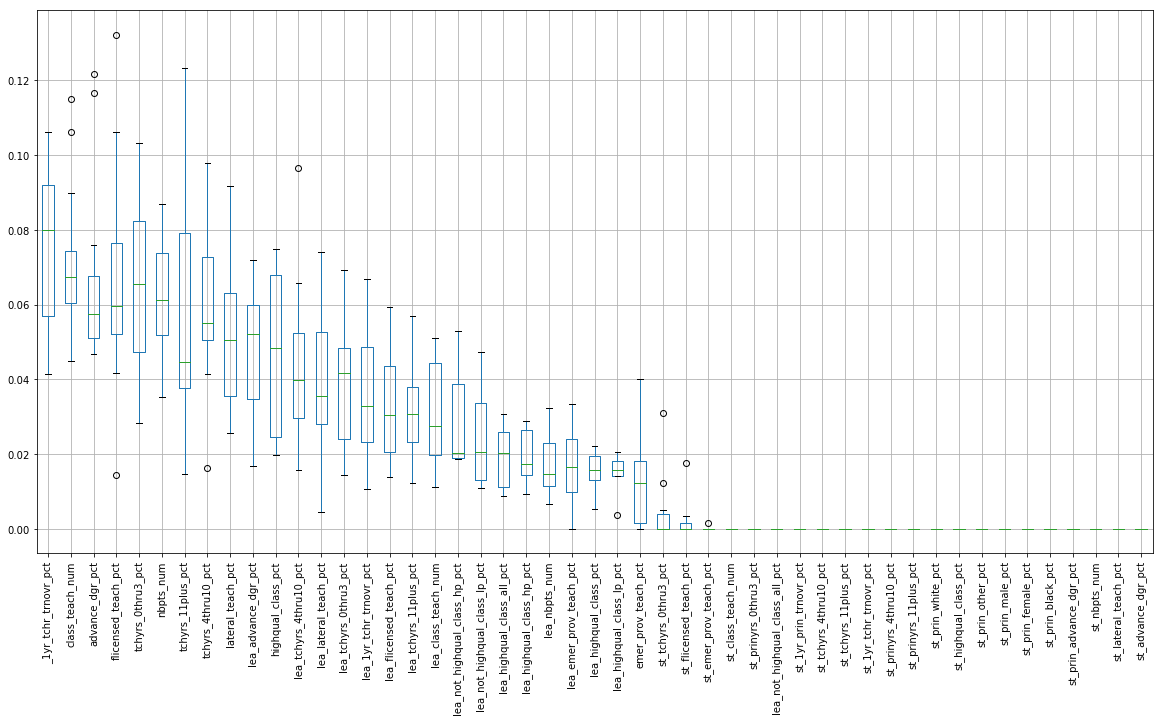

In [7]:
personnel_importances = get_importances(varset=personnel_vars)
personnel_importances_plots = personnel_importances.sort_values('mean', ascending=False).T.drop(['mean','std'], axis=0)
personnel_importances_plots.boxplot(figsize=(20,10), rot=90)

# YOE Variables Only

Not sure if this really makes sense given that each variable is a percentage of the whole set of variables...

Would need to look at a regression coefficient (or synthesized data) to determine which ones really carry significant meanings

In [8]:
yoe_vars = ['0-3 Years_Exp_Pct_Tch',
 '10+ Years_Exp_Pct_Tch',
 '4-10 Years_Exp_Pct_Tch',
 '0-3 Years_LEA_Exp_Pct_Prin',
 '10+ Years_LEA_Exp_Pct_Prin',
 '4-10 Years_LEA_Exp_Pct_Prin',
 'LPS']

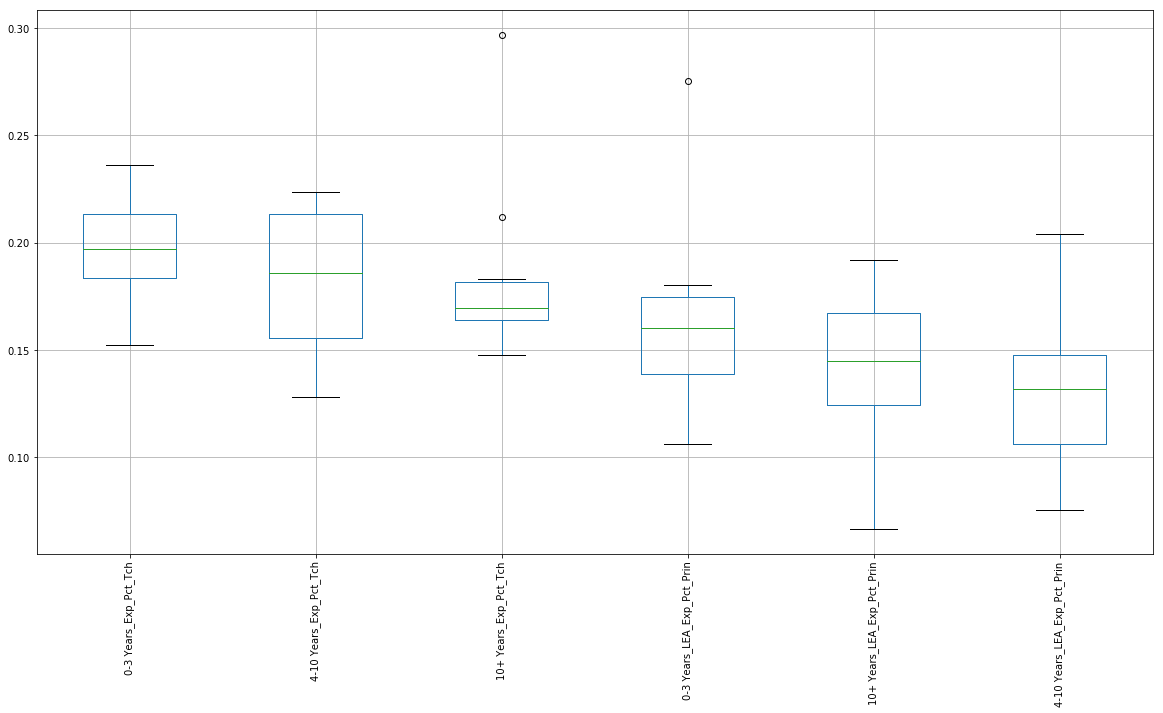

In [9]:
yoe_importances = get_importances(varset=yoe_vars)
yoe_importances_plots = yoe_importances.sort_values('mean', ascending=False).T.drop(['mean','std'], axis=0)
yoe_importances_plots.boxplot(figsize=(20,10), rot=90)

# High School Only

In [11]:
high_school_datasets = [df_high_14,
                        df_high_15,
                        df_high_16,
                        df_high_17]

col_names = ["df_high_14_featimp",
            "df_high_15_featimp",
            "df_high_16_featimp",
            "df_high_17_featimp"]

def get_importances(col_names=col_names, varset='all'):
    
    importances = pd.DataFrame()
    for df in high_school_datasets:
        temp = xg_booster_seat(df, varset=varset)
        importances = pd.concat([importances, temp], axis=1)
    
    importances.columns = col_names
    importances['mean'] = importances.mean(axis=1)
    importances['std'] = importances.std(axis=1)
    
    return importances

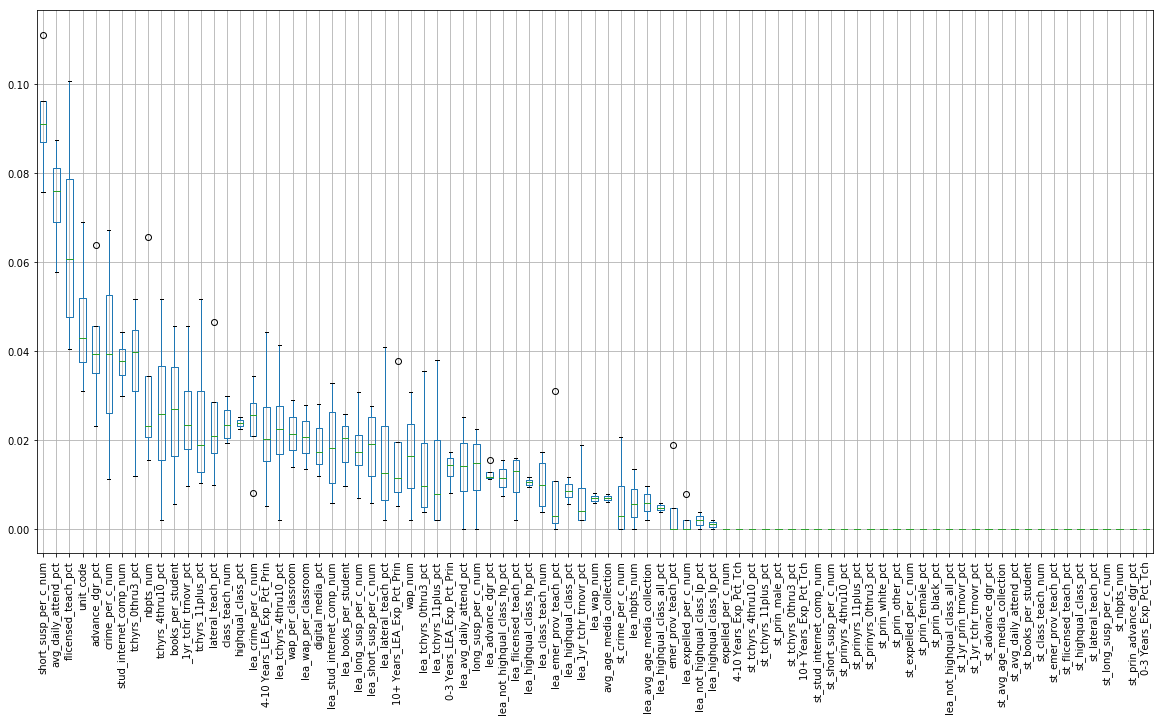

In [12]:
high_school_importances = get_importances()
high_school_importances_plots = high_school_importances.sort_values('mean', ascending=False).T.drop(['mean','std'], axis=0)
high_school_importances_plots.boxplot(figsize=(20,10), rot=90)

# Middle School Only

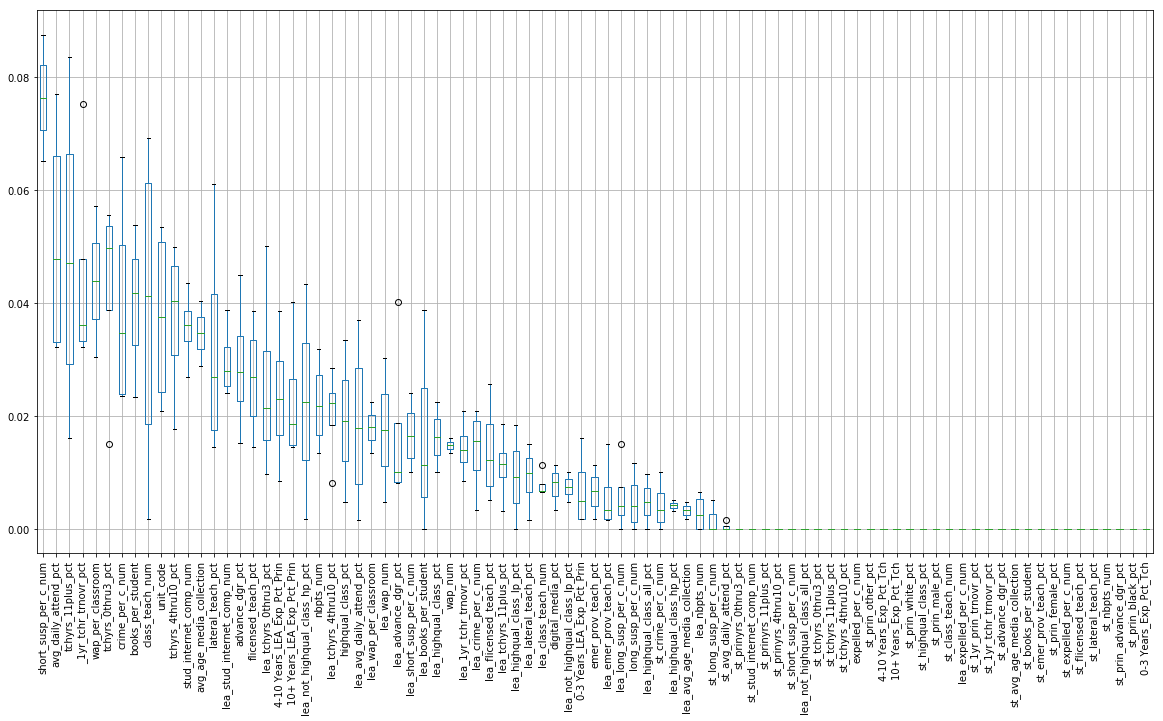

In [13]:
mid_school_datasets = [df_mid_14,
                        df_mid_15,
                        df_mid_16,
                        df_mid_17]

col_names = ["df_mid_14_featimp",
            "df_mid_15_featimp",
            "df_mid_16_featimp",
            "df_mid_17_featimp"]

def get_importances(col_names=col_names, varset='all'):
    
    importances = pd.DataFrame()
    for df in mid_school_datasets:
        temp = xg_booster_seat(df, varset=varset)
        importances = pd.concat([importances, temp], axis=1)
    
    importances.columns = col_names
    importances['mean'] = importances.mean(axis=1)
    importances['std'] = importances.std(axis=1)
    
    return importances

mid_school_importances = get_importances()
mid_school_importances_plots = mid_school_importances.sort_values('mean', ascending=False).T.drop(['mean','std'], axis=0)
mid_school_importances_plots.boxplot(figsize=(20,10), rot=90)

# Elementary School Only

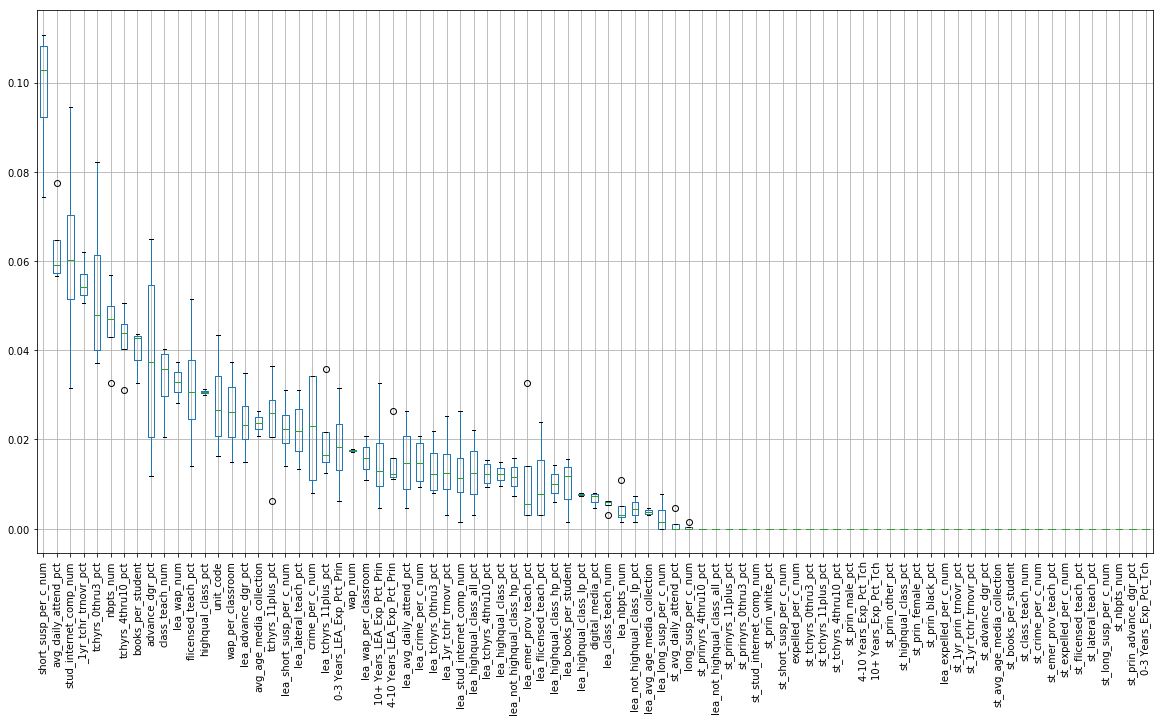

In [14]:
elem_school_datasets = [df_elem_14,
                        df_elem_15,
                        df_elem_16,
                        df_elem_17]

col_names = ["df_elem_14_featimp",
            "df_elem_15_featimp",
            "df_elem_16_featimp",
            "df_elem_17_featimp"]

def get_importances(col_names=col_names, varset='all'):
    
    importances = pd.DataFrame()
    for df in elem_school_datasets:
        temp = xg_booster_seat(df, varset=varset)
        importances = pd.concat([importances, temp], axis=1)
    
    importances.columns = col_names
    importances['mean'] = importances.mean(axis=1)
    importances['std'] = importances.std(axis=1)
    
    return importances

elem_school_importances = get_importances()
elem_school_importances_plots = elem_school_importances.sort_values('mean', ascending=False).T.drop(['mean','std'], axis=0)
elem_school_importances_plots.boxplot(figsize=(20,10), rot=90)